

```
Ce programme est fait pour transformer un texte brut (UTF-8)
vers un fichier XML mis en page :
- <W>
-<l>
-<lg>

L'élément strophe_texts est le parent de tous,
strophe_text est un de ses enfants dans l'arborescence.
Cet enfant à des enfants : <l>
Et cet enfant à des enfants : <w>


Pour fonctionner le texte doit :
- Être encodé en utf-8
- Ne pas comporter de titre de partie, seulement les strophes à encoder
- Avoir des vers / lignes avec un seul retour à la ligne
- Avoir des strophes définies par deux retours à la ligne
- Être imoporté dans le drive

Source pour la compréhension de la librairie :
https://docs.python.org/3/library/xml.etree.elementtree.html#building-xml-documents

```



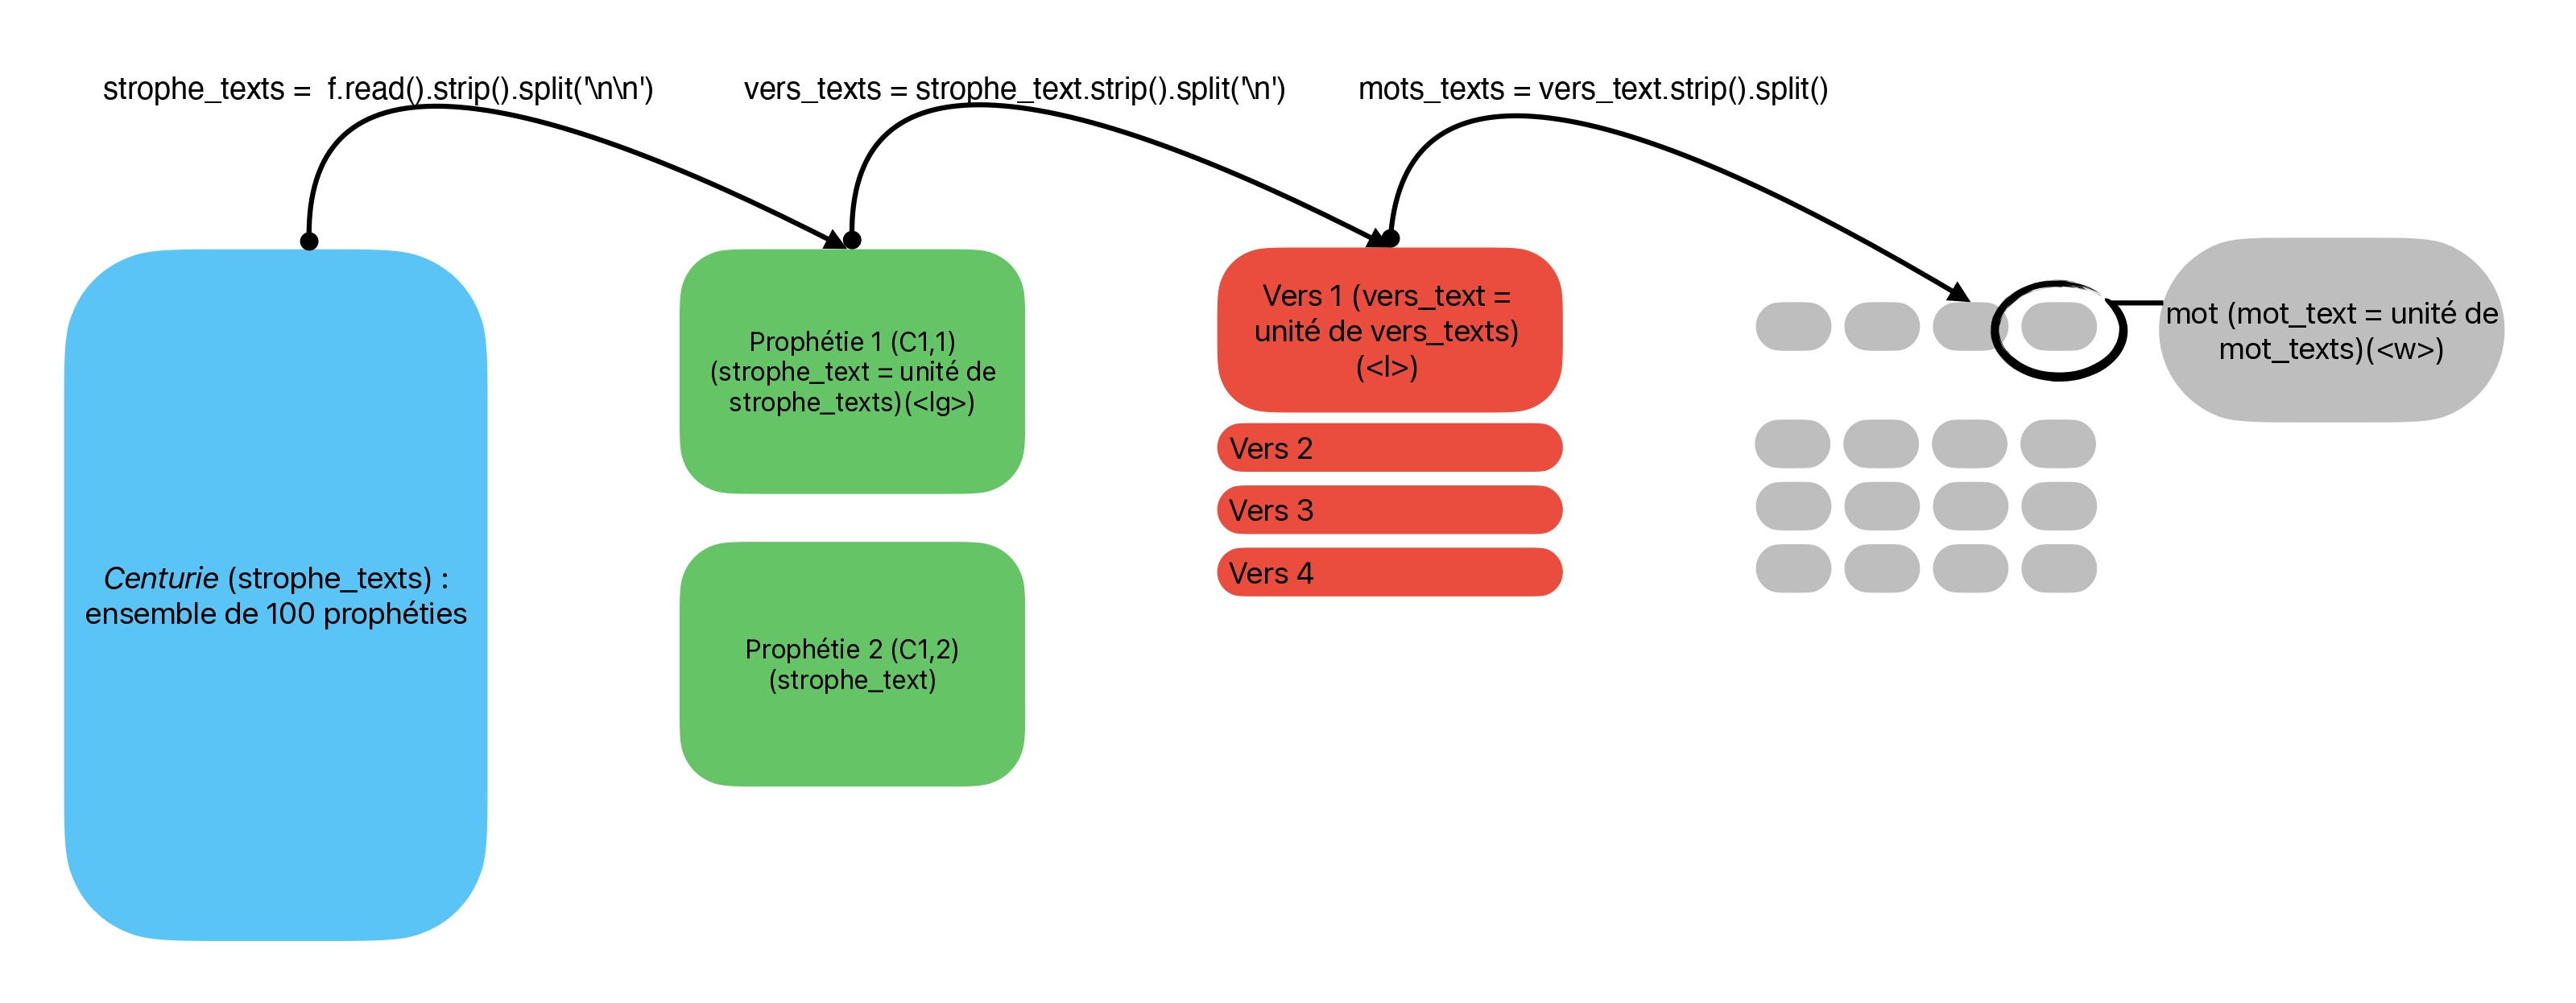

#Import des librairies

In [ ]:
import xml.etree.ElementTree as ET

#Définition de la fonction de balissage du texte

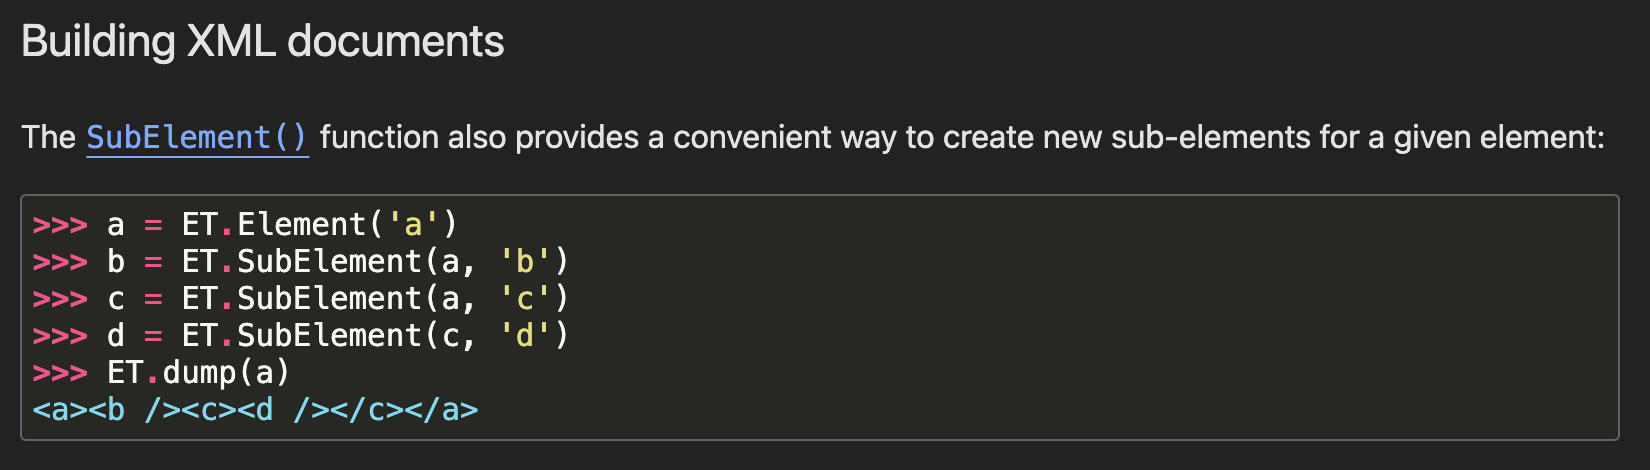

https://docs.python.org/3/library/xml.etree.elementtree.html#building-xml-documents

In [ ]:
def balise_texte (fichier_txt):
  with open (fichier_txt, 'r', encoding='utf-8')as f:
    strophe_texts = f.read().strip().split('\n\n') # Le contenu (str) est lu, trié d'espaces superflus et découpé en strophes qu'il reconnait grâce au double saut de ligne.

  racine = ET.Element('text') # Création de la racine du texte pour le passer sur Oxygen

  lg_counter=0 #Initialisation du conteur de strophes à 0
  for strophe_text in strophe_texts :
    lg_counter+=1
    if lg_counter <= 100:
      lg_element = ET.SubElement(racine, 'lg', n=str(lg_counter)) # Ajout des balises <lg> et de l'attribut '@n' pour compter les strophes
    else:
      lg_counter=1
      lg_element = ET.SubElement(racine, 'lg', n=str(lg_counter))

    vers_texts = strophe_text.strip().split('\n')
    # strophe_text est maintenant une chaîne, elle peut être traitée en tant que telle (.strip() fonctionne)
    #Les vers sont découpés en strophes grâce à un seul saut de ligne

    l_counter=0 #Le compteur ici permet de se remettre à 0 une fois que la strophe est terminée, il s'adapte à la forme (quatrain : il s'arrête à 4)
    for vers_text in vers_texts:
      l_counter +=1
      l_element = ET.SubElement (lg_element, 'l',n=str(l_counter)) # Ajout des balises <l> et numérotation des vers

      mots_texts = vers_text.strip().split()

      for mot_text in mots_texts:
        w_element=ET.SubElement(l_element,'w') # Ajout des balises <w>
        w_element.text = mot_text

  #Définition du nom du fichier .xml qui est identique au fichier.txt source
  fichier_xml = fichier_txt.replace('.txt', '.xml')
  arbre=ET.ElementTree(racine)
  arbre.write (fichier_xml, encoding='utf-8', xml_declaration=True)

#Test du code

In [ ]:
chemin= input("Chemin du texte ?")

Chemin du texte ?/content/prophéties_1555_vienne_texte_sans titre.txt


In [ ]:
balise_texte(chemin)